## 0. Importing Required Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
pd.set_option('display.max_columns',None)

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve

## 1. Data Preview & Cleaning

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
warnings.filterwarnings('ignore')
df=pd.read_csv("/content/drive/MyDrive/Data and files/train.csv")

In [ ]:
df.head(10)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
5,0x1607,CUS_0xd40,June,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",8,4,9.27,4.0,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.430172331195294,!@9#%8,340.4792117872438,Good
6,0x1608,CUS_0xd40,July,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,8_,11.27,4.0,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.3440674122349,Low_spent_Small_value_payments,244.5653167062043,Good
7,0x1609,CUS_0xd40,August,NaN,23,#F%$D@*&8,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,6,11.27,4.0,Good,809.98,23.933795,NaN,No,49.574949,24.785216509052056,High_spent_Medium_value_payments,358.12416760938714,Standard
8,0x160e,CUS_0x21b1,January,Rick Rothackerj,28_,004-07-5839,_______,34847.84,3037.986667,2,4,6,1,Credit-Builder Loan,3,4,5.42,2.0,Good,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.291825168246,Low_spent_Small_value_payments,470.69062692529184,Standard
9,0x160f,CUS_0x21b1,February,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,4,6,1,Credit-Builder Loan,7,1,7.42,2.0,Good,605.03,38.550848,26 Years and 8 Months,No,18.816215,40.39123782853101,High_spent_Large_value_payments,484.5912142650067,Good


In [ ]:
df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [ ]:
df.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217
std,3183.686167,117.404834,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,15204.633333,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


In [ ]:
df.describe(include="object")

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Num_of_Loan,Type_of_Loan,Num_of_Delayed_Payment,Changed_Credit_Limit,Credit_Mix,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
count,100000,100000,100000,90015,100000,100000,100000,100000,100000,88592,92998,100000,100000,100000,90970,100000,95521,100000,98800,100000
unique,100000,12500,8,10139,1788,12501,16,18940,434,6260,749,4384,4,13178,404,3,91049,7,98792,3
top,0x25fd5,CUS_0x942c,January,Stevex,38,#F%$D@*&8,_______,36585.12,3,Not Specified,19,_,Standard,1360.45,15 Years and 11 Months,Yes,__10000__,Low_spent_Small_value_payments,__-333333333333333333333333333__,Standard
freq,1,8,12500,44,2833,5572,7062,16,14386,1408,5327,2091,36479,24,446,52326,4305,25513,9,53174


In [ ]:
df["Credit_Score"].value_counts()

,count
Credit_Score,
Standard,53174
Poor,28998
Good,17828


Clearly we can see that the classes are imbalanced here

In [ ]:
df.shape

(100000, 28)

In [ ]:
((df.isnull().sum()/len(df))*100).sort_values(ascending=False)    # missing value % out out total data

,0
Monthly_Inhand_Salary,15.002
Type_of_Loan,11.408
Name,9.985
Credit_History_Age,9.030
Num_of_Delayed_Payment,7.002
Amount_invested_monthly,4.479
Num_Credit_Inquiries,1.965
Monthly_Balance,1.200
Month,0.000
Age,0.000


Num_of_Delayed_Payment, Amount_invested_monthly, Monthly_Balance,
Num_Credit_Inquiries  have missing values

In [ ]:
str_to_int=['Age','Num_of_Loan']
str_to_float=['Annual_Income','Num_of_Delayed_Payment','Changed_Credit_Limit','Outstanding_Debt','Amount_invested_monthly','Monthly_Balance']

In [ ]:
for i in str_to_int:
    df[i]=df[i].str.replace('_','')
    df[df[i]=='']=np.nan
    df[i]=df[i].astype(int)

In [ ]:
for j in str_to_float:
    df[j]=df[j].str.replace('_','')
    df[df[j]=='']=np.nan
    df[j]=df[j].astype(float)

In [ ]:
df.dropna(how='all',inplace=True)

In [ ]:
dropped=['ID','Customer_ID','Month','Name','Type_of_Loan','SSN','Occupation']   # dropping the less useful features
df.drop(columns=dropped,axis=1,inplace=True)
df.shape

(97909, 21)

In [ ]:
columns_c=df.select_dtypes(include='object').columns.tolist()    # categorical features
columns_n=df.drop(columns=columns_c,axis=1).columns.tolist()     # numerical features

In [ ]:
for i in columns_c:
    df[i]=df[i].str.replace('_______','')
    df[i]=df[i].str.replace('!@9#%8','')
    df[i]=df[i].str.replace('_','')

In [ ]:
for i in columns_c:
    df[i]=df[i].replace('',np.nan)

In [ ]:
df.shape

(97909, 21)

## 2. Outliers Detection & Missing Value Imputation

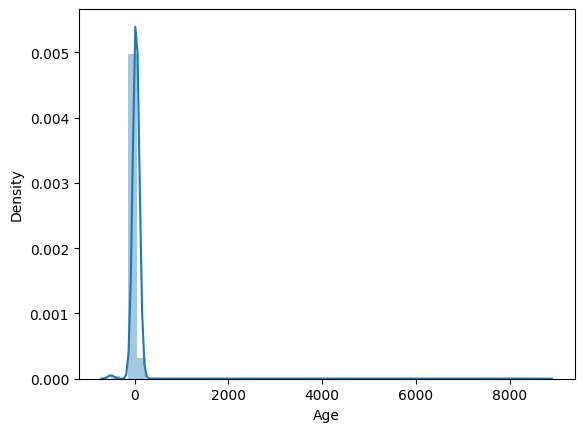

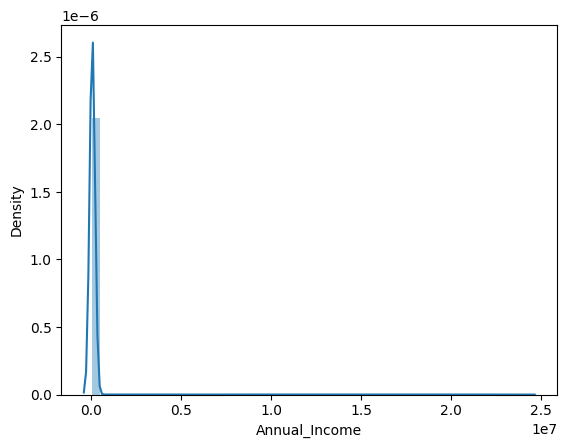

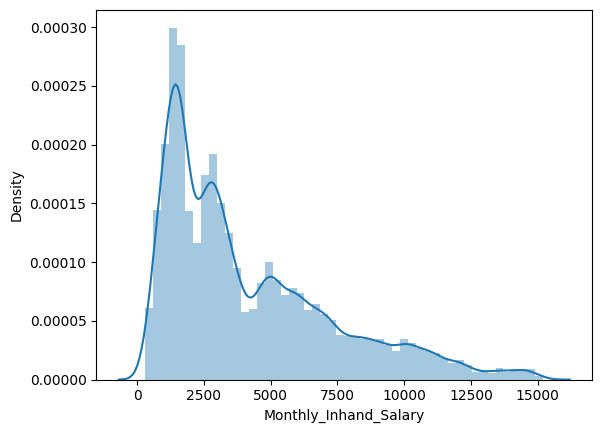

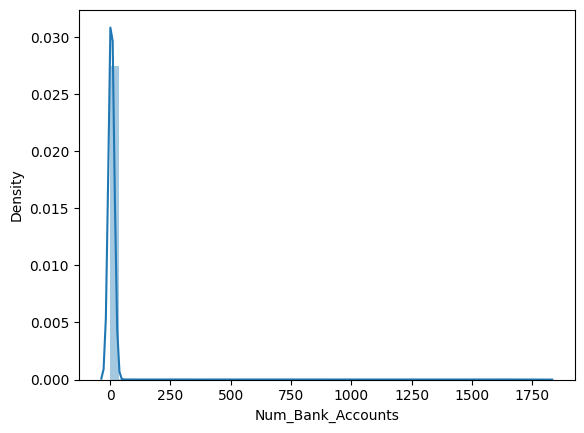

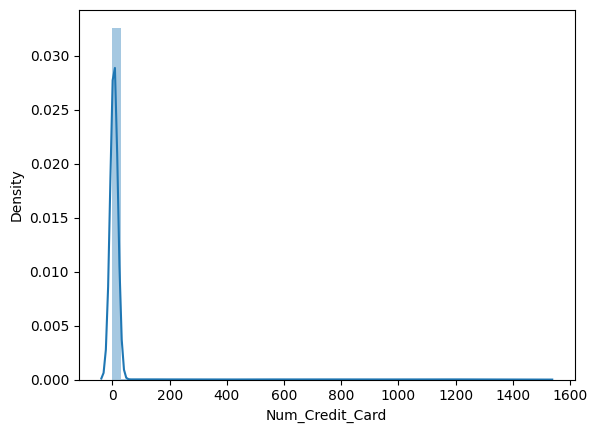

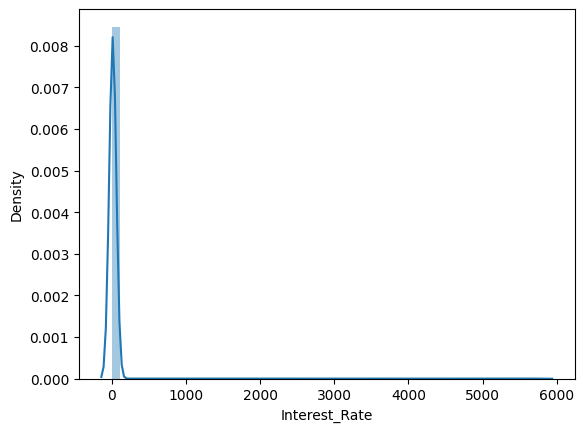

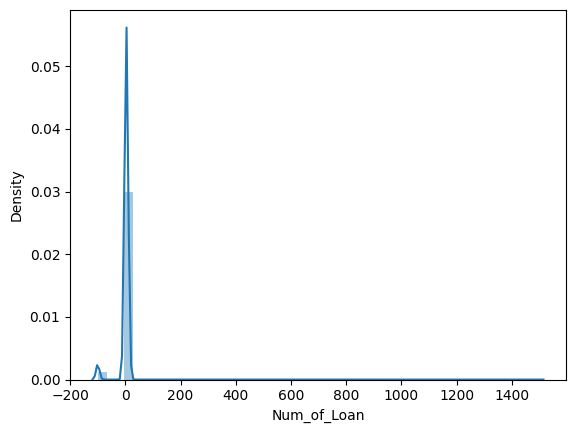

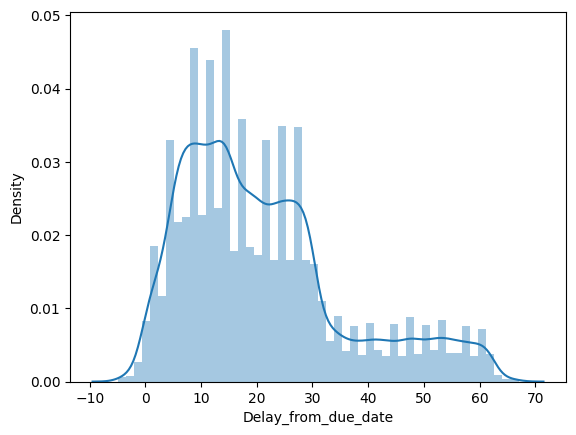

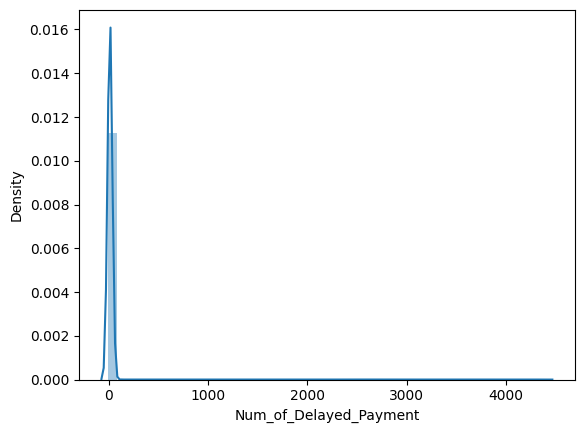

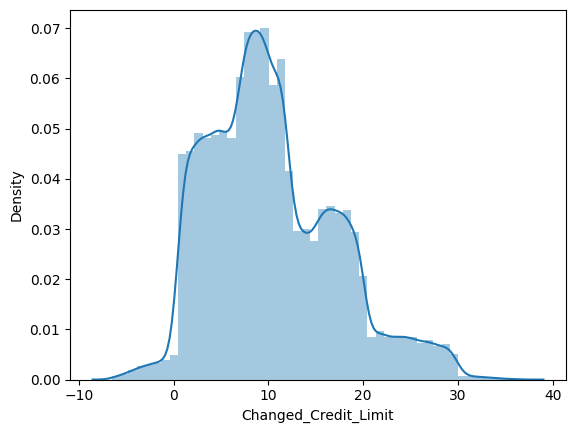

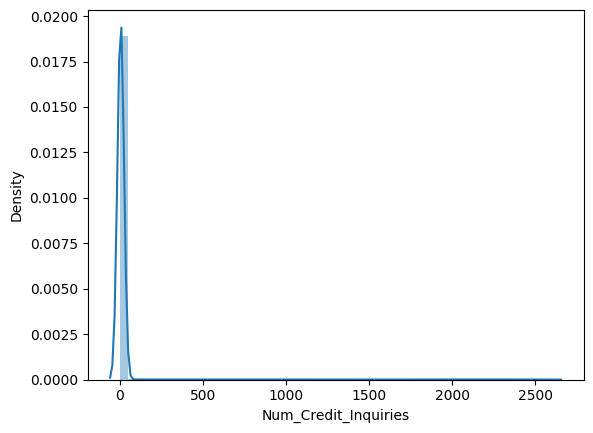

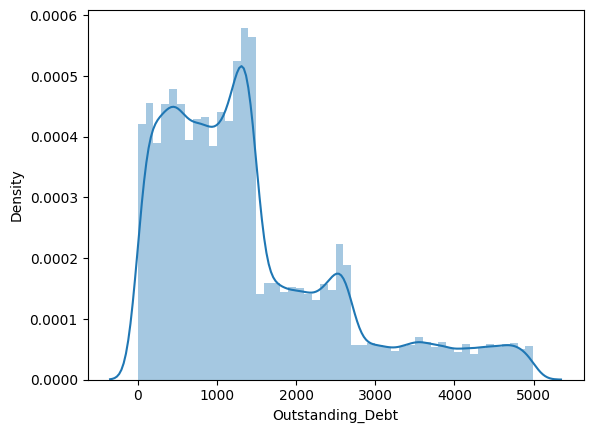

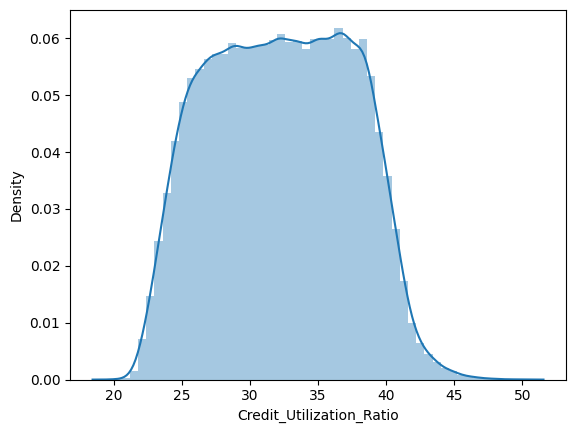

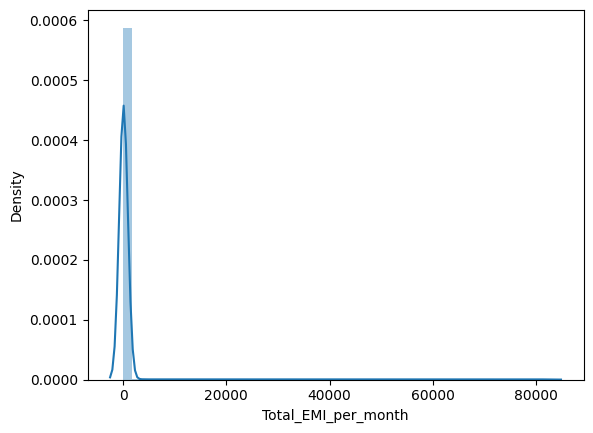

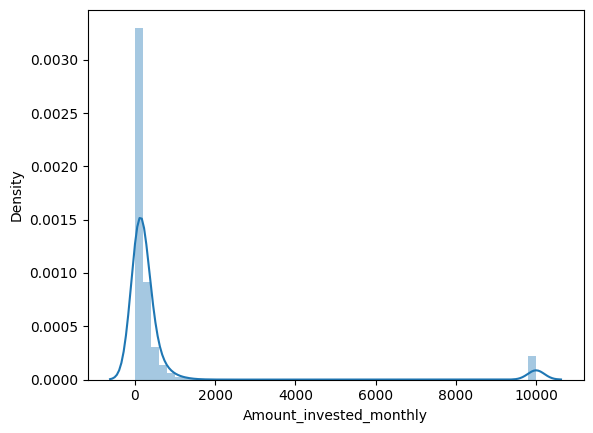

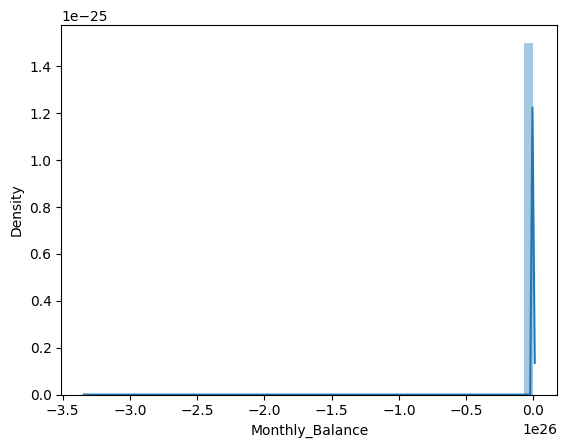

In [ ]:
for i in columns_n:
    sns.distplot(df[i])
    plt.show()

**Missing Value Imputation**

In [ ]:
df.reset_index(drop=True,inplace=True)

In [ ]:
for i in columns_n:
    # Replace empty strings with NaN
    df[i].replace('', np.nan, inplace=True)

    # Fill NaN values with the median of the column
    df[i].fillna(df[i].median(), inplace=True)

In [ ]:
for i in columns_c:
    df[i].replace('',np.nan,inplace=True)
    df[i].fillna(df[i].mode()[0],inplace=True)


* Convert Credit_History_Age to months

In [ ]:
import re
def convert_credit_history_age(age_str):
    if pd.isna(age_str):
        return np.nan
    years, months = re.findall(r'\d+', age_str)
    return int(years) * 12 + int(months)

df['Credit_History_Age_Months'] = df['Credit_History_Age'].apply(convert_credit_history_age)


In [ ]:
df["Payment_Behaviour"].value_counts()

,count
Payment_Behaviour,
LowspentSmallvaluepayments,32414
HighspentMediumvaluepayments,17141
LowspentMediumvaluepayments,13571
HighspentLargevaluepayments,13439
HighspentSmallvaluepayments,11121
LowspentLargevaluepayments,10223


Now we'll split this "Payment_Behaviour" feature into two new features ***'Payment_Spent' & 'Payment_Value'*** for better representation

In [ ]:
# Split the 'Payment_Behaviour' column into two new features: 'Payment_Spent' and 'Payment_Value'
split_values = df['Payment_Behaviour'].str.extract(r'(Low|High)(spent)(Small|Medium|Large)', expand=True)

# Rename the new columns for clarity
split_values.columns = ['Payment_Spent', 'Spent_Indicator', 'Payment_Value']

# Drop the unnecessary 'Spent_Indicator' column
df = pd.concat([df, split_values[['Payment_Spent', 'Payment_Value']]], axis=1)

# Display the resulting DataFrame
df.drop(columns=["Payment_Behaviour"],inplace=True)


In [ ]:
df.head()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score,Credit_History_Age_Months,Payment_Spent,Payment_Value
0,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,11.27,4.0,Standard,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.415295,312.494089,Good,265,High,Small
1,23.0,19114.12,3091.260833,3.0,4.0,3.0,4.0,-1.0,14.0,11.27,4.0,Good,809.98,31.944960,19 Years and 4 Months,No,49.574949,118.280222,284.629162,Good,232,Low,Large
2,23.0,19114.12,3091.260833,3.0,4.0,3.0,4.0,5.0,4.0,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.458074,223.451310,Good,268,Low,Small
3,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,6.0,14.0,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153,341.489231,Good,269,High,Medium
4,23.0,19114.12,3091.260833,3.0,4.0,3.0,4.0,8.0,4.0,9.27,4.0,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.430172,340.479212,Good,270,Low,Small


In [ ]:
df.drop(columns=['Credit_History_Age'],inplace=True)
columns_c.remove('Credit_History_Age')

In [ ]:
df.shape

(97909, 22)

**Outlier detectation & treatment**

#### Clearly there some extreme values and some outliers and we will try to remove only the outliers.
1. One person can not have so many Bank accounts and credit cards.
2. The Interest_Rate seems very much higher than usual.
3. Number_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment and Num_Credit_Inquiries can not be negative.
4. Some accounts have highly negative Monthly_Balance.

In [ ]:
df.drop(df[(df['Age']>120)].index,inplace=True)

In [ ]:
for i in columns_n[0:15]:
    df.drop(df[(df[i]<0.0)].index,inplace=True)

In [ ]:
df.shape

(88916, 22)

In [ ]:
for i in ['Num_Bank_Accounts','Num_Credit_Card','Interest_Rate','Num_of_Loan','Num_of_Delayed_Payment','Num_Credit_Inquiries']:
    Q1=df[i].quantile(0.25)
    Q3=df[i].quantile(0.75)
    IQR=Q3-Q1
    df.drop(df[(df[i]>Q3+1.5*IQR)|(df[i]<Q1-1.5*IQR)].index,inplace=True)

In [ ]:
df.shape

(81585, 22)

***Creating New Feature : "Debt-to-Income Ratio" & checking it significance on Credit Score feature using ANOVA***

In [ ]:
df['Debt_to_Income_Ratio'] = df['Outstanding_Debt'] / df['Annual_Income']

In [ ]:
import scipy.stats as stats

# Grouping Debt_to_Income_Ratio values by Credit Score category
poor = df[df["Credit_Score"] == "Poor"]["Debt_to_Income_Ratio"]
standard = df[df["Credit_Score"] == "Standard"]["Debt_to_Income_Ratio"]
good = df[df["Credit_Score"] == "Good"]["Debt_to_Income_Ratio"]

# ANOVA Test
f_stat, p_value = stats.f_oneway(poor,standard,good)

print("ANOVA F-statistic:", f_stat)
print("P-value:", p_value)

# Interpretation
if p_value < 0.05:
    print("Debt-to-Income Ratio is significantly different across credit score categories (p < 0.05).")
else:
    print("Debt-to-Income Ratio is not significantly different across credit score categories (p >= 0.05).")

ANOVA F-statistic: 4043.211192753965
P-value: 0.0
Debt-to-Income Ratio is significantly different across credit score categories (p < 0.05).


Hence using ANOVA, we can say that Debt-to-Income Ratio has significance

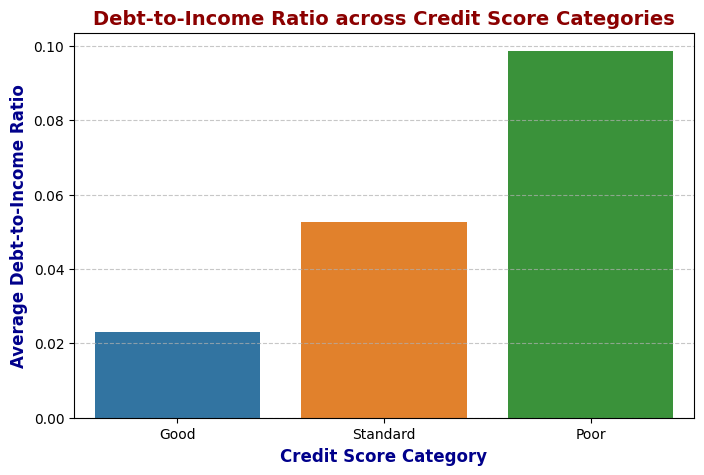

In [ ]:

# Define color palette
colors = ["#1f77b4", "#ff7f0e", "#2ca02c"]  # Blue, Orange, Green

# Bar plot for Debt-to-Income Ratio across Credit Score Categories
plt.figure(figsize=(8, 5))
sns.barplot(
    x=df['Credit_Score'],
    y=df['Debt_to_Income_Ratio'],
    estimator=np.mean,
    ci=None,
    palette=colors  # Apply color palette
)

# Styling
plt.xlabel("Credit Score Category", fontsize=12, fontweight='bold', color='darkblue')
plt.ylabel("Average Debt-to-Income Ratio", fontsize=12, fontweight='bold', color='darkblue')
plt.title("Debt-to-Income Ratio across Credit Score Categories", fontsize=14, fontweight='bold', color='darkred')
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines for better readability

# Show plot
plt.show()


## 4. Visualization

In [ ]:
df1 = df.select_dtypes(include=['number'])
corr= df1.corr()
corr

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_History_Age_Months,Debt_to_Income_Ratio
Age,1.000000,0.006426,0.080300,-0.187248,-0.146251,-0.214281,-0.210842,-0.170390,-0.172778,-0.156267,-0.246750,-0.200338,0.023693,0.000055,0.001574,-0.001938,0.223730,-0.144302
Annual_Income,0.006426,1.000000,0.029183,-0.008727,-0.002759,-0.007921,-0.004573,-0.011645,-0.007316,-0.000014,-0.008127,-0.004394,0.012035,-0.003252,-0.005021,0.000902,-0.000188,-0.073955
Monthly_Inhand_Salary,0.080300,0.029183,1.000000,-0.253593,-0.196915,-0.274638,-0.233017,-0.226017,-0.246140,-0.158673,-0.252351,-0.247426,0.155226,0.006868,0.056506,-0.000929,0.239812,-0.444614
Num_Bank_Accounts,-0.187248,-0.008727,-0.253593,1.000000,0.440973,0.579178,0.470500,0.553250,0.572146,0.332110,0.510261,0.505461,-0.071033,-0.006020,-0.017275,0.005811,-0.459636,0.396474
Num_Credit_Card,-0.146251,-0.002759,-0.196915,0.440973,1.000000,0.495137,0.418256,0.478387,0.402154,0.256030,0.453681,0.491814,-0.052452,-0.005022,-0.010118,0.001711,-0.398110,0.372396
Interest_Rate,-0.214281,-0.007921,-0.274638,0.579178,0.495137,1.000000,0.557012,0.583349,0.543810,0.369524,0.624295,0.628894,-0.074928,-0.004094,-0.015658,0.004302,-0.550285,0.483219
Num_of_Loan,-0.210842,-0.004573,-0.233017,0.470500,0.418256,0.557012,1.000000,0.498399,0.455269,0.377104,0.556368,0.639862,-0.099391,-0.001977,-0.012601,0.001481,-0.579758,0.484874
Delay_from_due_date,-0.170390,-0.011645,-0.226017,0.553250,0.478387,0.583349,0.498399,1.000000,0.514262,0.294562,0.531024,0.570364,-0.065006,-0.006347,-0.010140,0.005140,-0.466420,0.429009
Num_of_Delayed_Payment,-0.172778,-0.007316,-0.246140,0.572146,0.402154,0.543810,0.455269,0.514262,1.000000,0.314390,0.473678,0.485546,-0.070700,-0.002934,-0.019843,0.006798,-0.441713,0.369137
Changed_Credit_Limit,-0.156267,-0.000014,-0.158673,0.332110,0.256030,0.369524,0.377104,0.294562,0.314390,1.000000,0.377995,0.466065,-0.047971,-0.003396,-0.005133,-0.001964,-0.407855,0.346620


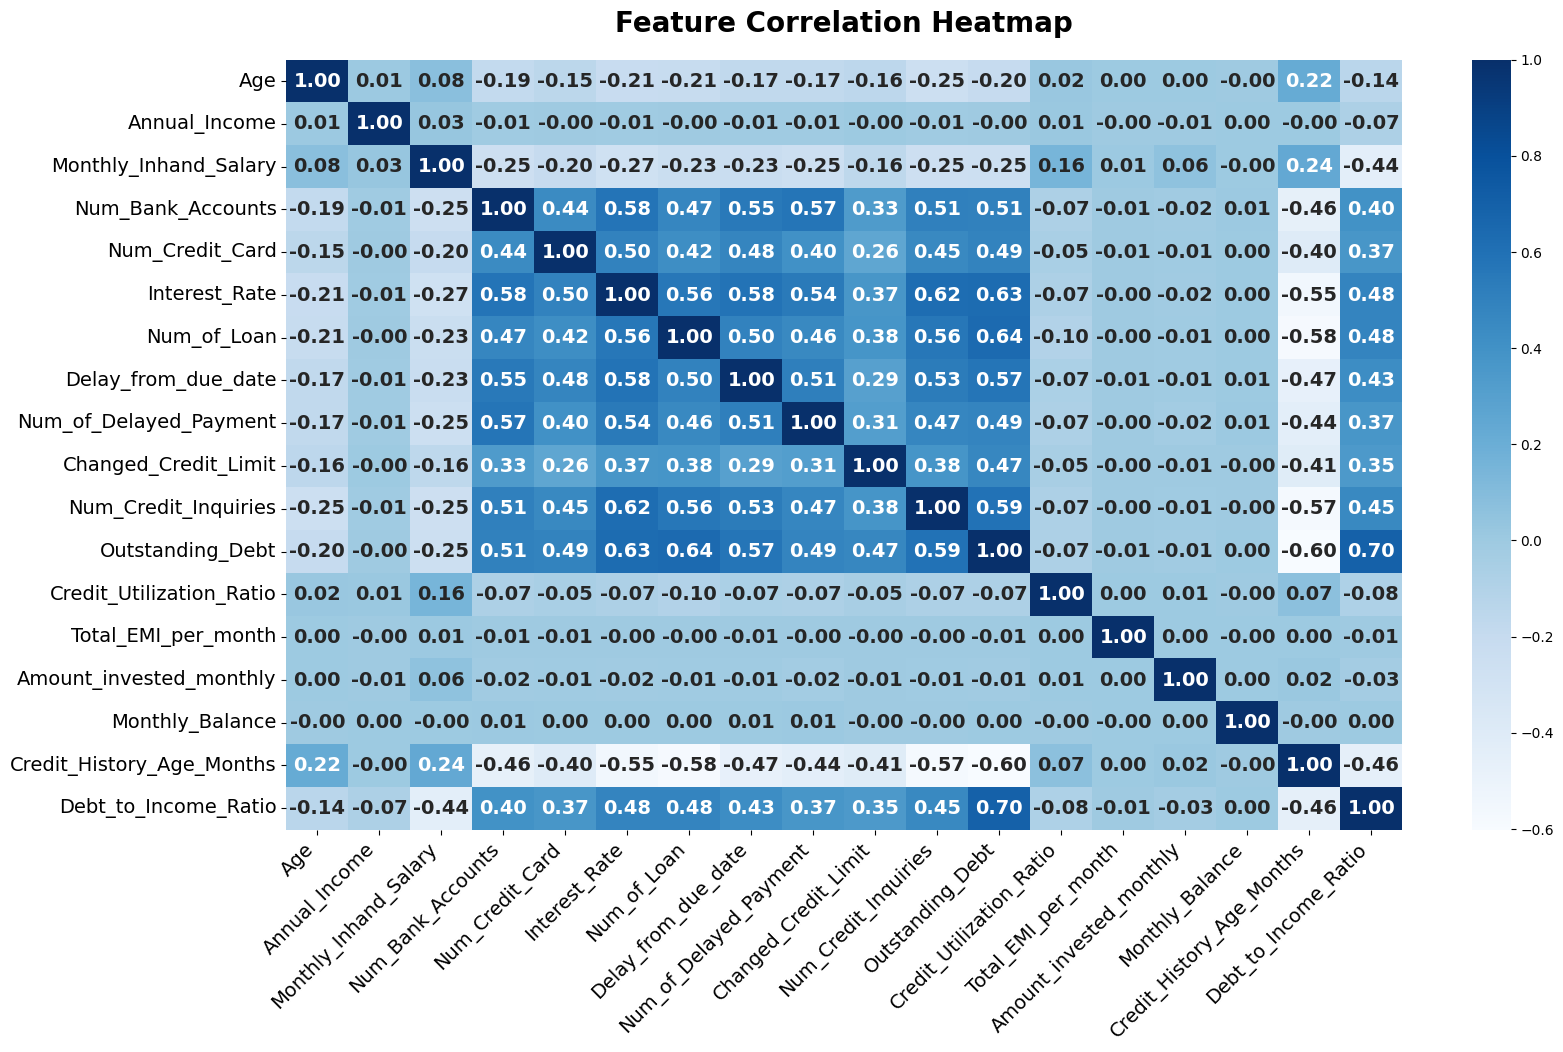

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size
plt.figure(figsize=(18, 10))

# Create a clean heatmap
sns.heatmap(df1.corr(),
            annot=True,
            fmt=".2f",  # Two decimal places for clarity
            cmap="Blues",  # Soft blue color scheme
            annot_kws={'size': 14, 'weight': 'bold'},  # Bigger, bold annotations
            cbar=True,  # Keep color bar
            square=False)  # Avoid forced symmetry

# Improve axis label readability
plt.xticks(fontsize=14, rotation=45, ha="right")
plt.yticks(fontsize=14)

# Add a title for context
plt.title("Feature Correlation Heatmap", fontsize=20, fontweight='bold', pad=20)

# Show the plot
plt.show()


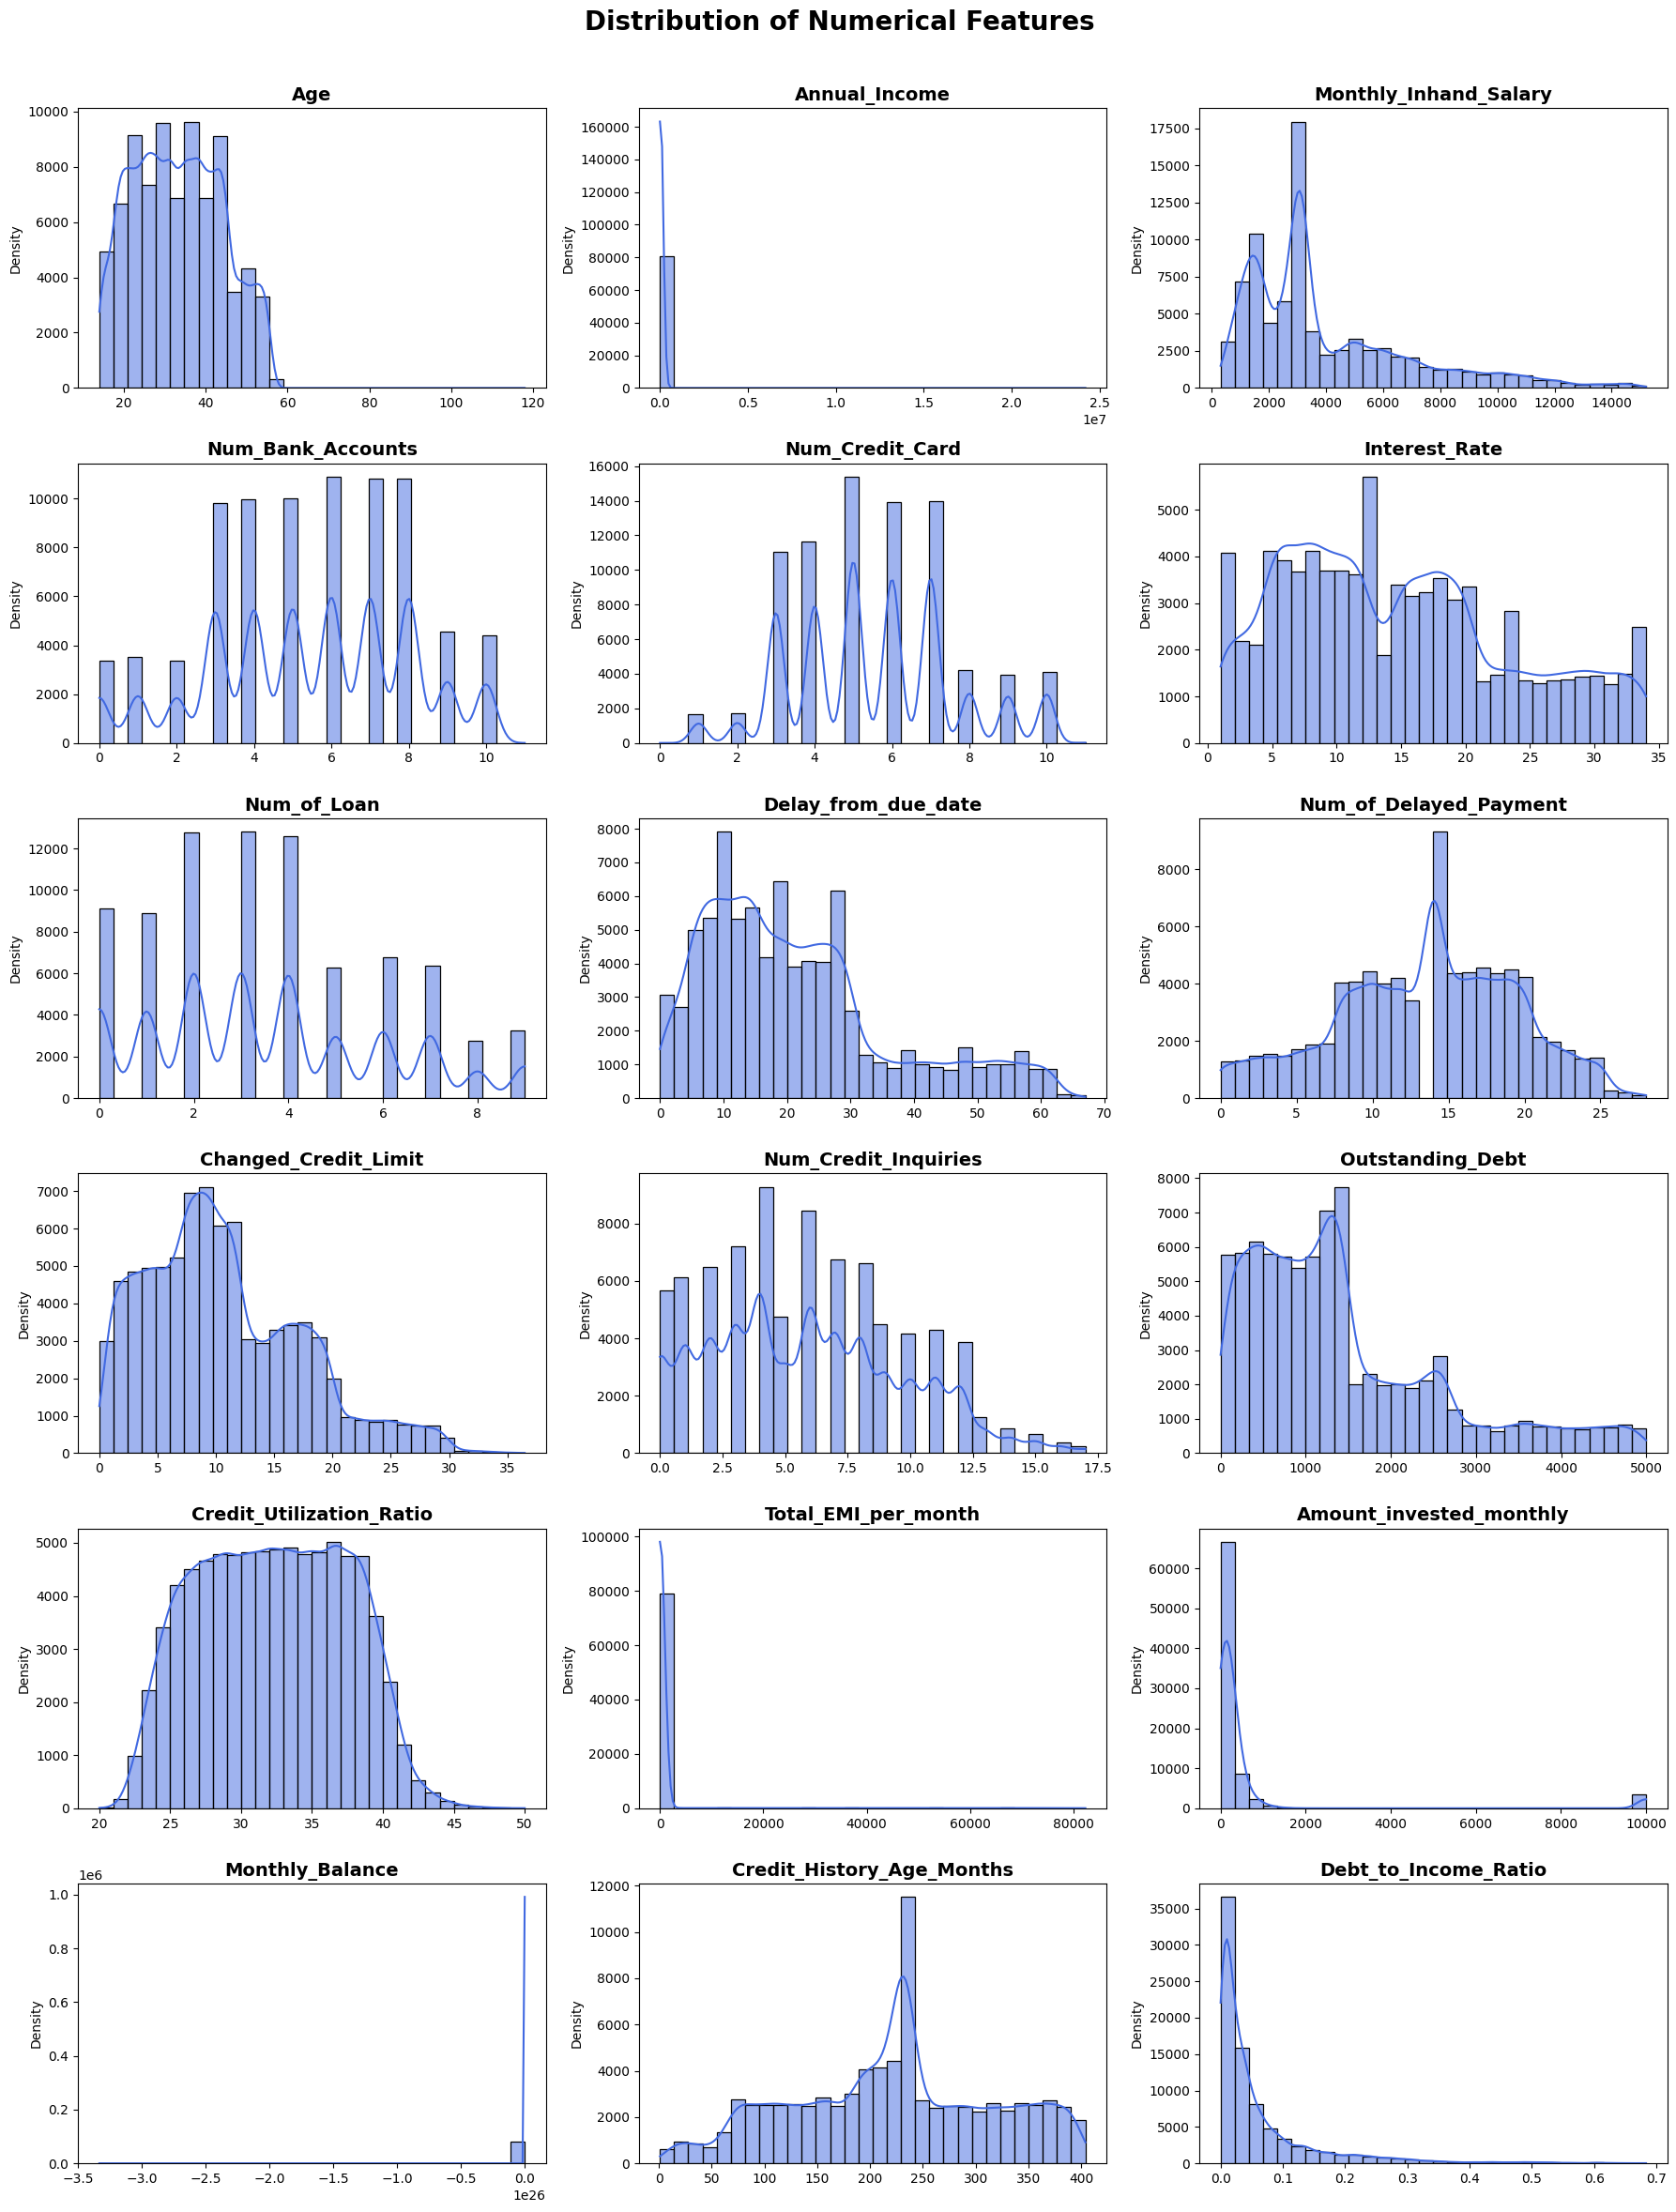

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import PowerTransformer

# Define numerical features
numerical_features = [
    "Age", "Annual_Income", "Monthly_Inhand_Salary", "Num_Bank_Accounts",
    "Num_Credit_Card", "Interest_Rate", "Num_of_Loan", "Delay_from_due_date",
    "Num_of_Delayed_Payment", "Changed_Credit_Limit", "Num_Credit_Inquiries",
    "Outstanding_Debt", "Credit_Utilization_Ratio", "Total_EMI_per_month",
    "Amount_invested_monthly", "Monthly_Balance", "Credit_History_Age_Months",
    "Debt_to_Income_Ratio"
]

# Set grid size
rows = 6
cols = 3
fig, axes = plt.subplots(rows, cols, figsize=(18, 24))
fig.suptitle("Distribution of Numerical Features", fontsize=20, fontweight="bold")

# Loop through numerical features and plot
for i, feature in enumerate(numerical_features):
    row, col = divmod(i, cols)
    sns.histplot(df[feature], bins=30, kde=True, ax=axes[row, col], color="royalblue")
    axes[row, col].set_title(feature, fontsize=14, fontweight="bold")
    axes[row, col].set_xlabel("")
    axes[row, col].set_ylabel("Density")

# Remove empty subplots
for i in range(len(numerical_features), rows * cols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


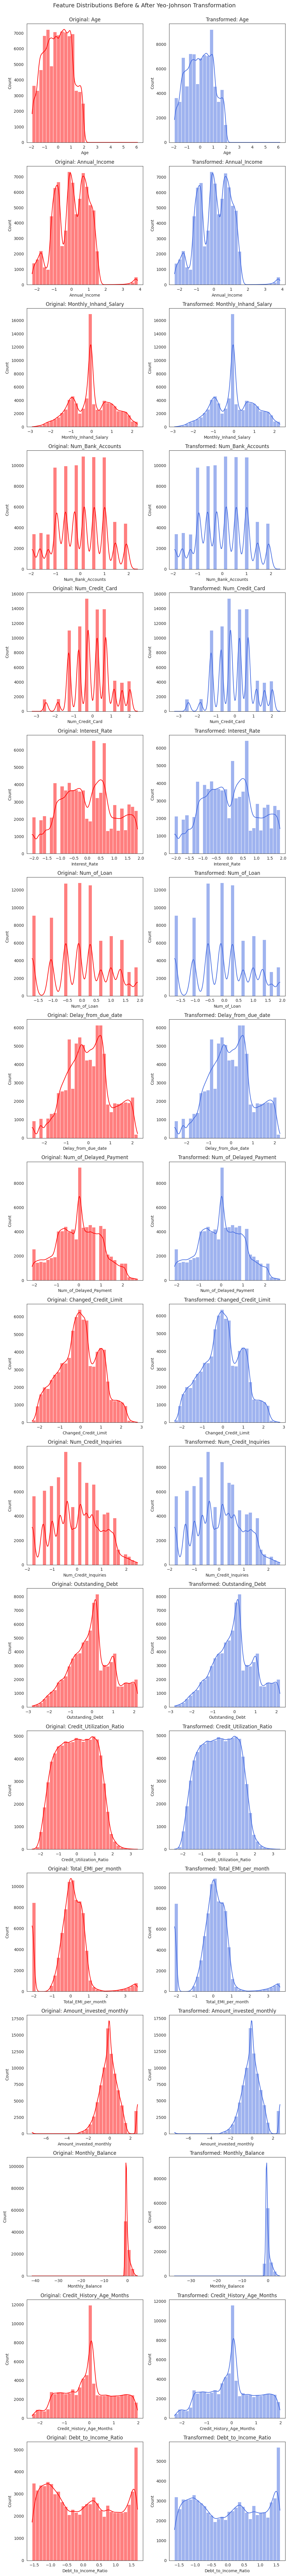

In [ ]:

from sklearn.preprocessing import PowerTransformer

# Define numerical features
numerical_features = [
    "Age", "Annual_Income", "Monthly_Inhand_Salary", "Num_Bank_Accounts",
    "Num_Credit_Card", "Interest_Rate", "Num_of_Loan", "Delay_from_due_date",
    "Num_of_Delayed_Payment", "Changed_Credit_Limit", "Num_Credit_Inquiries",
    "Outstanding_Debt", "Credit_Utilization_Ratio", "Total_EMI_per_month",
    "Amount_invested_monthly", "Monthly_Balance", "Credit_History_Age_Months",
    "Debt_to_Income_Ratio"
]

# Create a copy for transformed data
df_transformed = df.copy()

# Apply Yeo-Johnson Transformation
pt = PowerTransformer(method='yeo-johnson')  # Using Yeo-Johnson
df_transformed[numerical_features] = pt.fit_transform(df[numerical_features])

# Plot Before & After Transformation
num_cols = 2  # Two columns: Original & Transformed
num_rows = len(numerical_features)  # One row per feature

fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 5 * num_rows))
fig.suptitle("Feature Distributions Before & After Yeo-Johnson Transformation", fontsize=14)

for i, feature in enumerate(numerical_features):
    # Original Distribution
    sns.histplot(df[feature], bins=30, kde=True, color="red", ax=axes[i, 0])
    axes[i, 0].set_title(f"Original: {feature}")

    # Transformed Distribution
    sns.histplot(df_transformed[feature], bins=30, kde=True, color="royalblue", ax=axes[i, 1])
    axes[i, 1].set_title(f"Transformed: {feature}")

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()


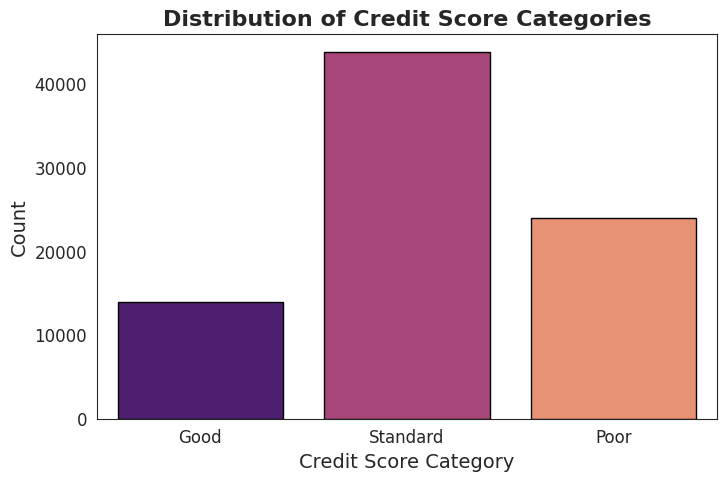

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x=df["Credit_Score"], palette="magma", edgecolor="black")
plt.title("Distribution of Credit Score Categories", fontsize=16, fontweight="bold")
plt.xlabel("Credit Score Category", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


**Feature Importance**

In [ ]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_classif, chi2
from sklearn.preprocessing import MinMaxScaler

# Define Features
numerical_features = [
    "Age", "Annual_Income", "Monthly_Inhand_Salary", "Num_Bank_Accounts",
    "Num_Credit_Card", "Interest_Rate", "Num_of_Loan", "Delay_from_due_date",
    "Num_of_Delayed_Payment", "Changed_Credit_Limit", "Num_Credit_Inquiries",
    "Outstanding_Debt", "Credit_Utilization_Ratio", "Total_EMI_per_month",
    "Amount_invested_monthly", "Monthly_Balance", "Credit_History_Age_Months",
    "Debt_to_Income_Ratio"
]

categorical_features = ["Credit_Mix", "Payment_Spent", "Payment_of_Min_Amount", "Payment_Value"]

# Define Target Variable
X_numerical = df[numerical_features]
X_categorical = df[categorical_features]
y = df["Credit_Score"]  # Target variable

# Feature Selection for Numerical Features (ANOVA F-test)
selector_num = SelectKBest(score_func=f_classif, k="all")
selector_num.fit(X_numerical, y)

# Feature Selection for Categorical Features (Chi-Square Test)
selector_cat = SelectKBest(score_func=chi2, k="all")
selector_cat.fit(X_categorical, y)

# Normalize Scores (0 to 1 scale for fair comparison)
scaler = MinMaxScaler()
numerical_scores = scaler.fit_transform(selector_num.scores_.reshape(-1, 1)).flatten()
categorical_scores = scaler.fit_transform(selector_cat.scores_.reshape(-1, 1)).flatten()

# Create DataFrames
df_numerical = pd.DataFrame({"Feature": numerical_features, "Score": numerical_scores})
df_categorical = pd.DataFrame({"Feature": categorical_features, "Score": categorical_scores})

# Merge and Rank Combined Features
df_combined = pd.concat([df_numerical, df_categorical]).sort_values(by="Score", ascending=False)

# Display Ranked Features
print("Combined Feature Importance Ranking \n (Higher Score = More Important)")
print(df_combined)


ValueError: could not convert string to float: 'Standard'

## 5. Encoding Categorical Features  

We'll use use ***Label Encoder***  for the Categorical features such as ***Credit_Mix, Credit_Score, Payment_Spent, Payment_of_Min_Amount & Payment_Value***

In [ ]:
from scipy.stats import chi2_contingency

categorical_features = ["Credit_Mix", "Payment_Spent", "Payment_of_Min_Amount", "Payment_Value"]

for feature in categorical_features:
    contingency_table = pd.crosstab(df[feature], df["Credit_Score"])
    chi2_stat, p, dof, expected = chi2_contingency(contingency_table)
    print(f"Chi-Square Test for {feature}: Chi2-statistic = {chi2_stat:.2f}, p-value = {p:.4f}")


Chi-Square Test for Credit_Mix: Chi2-statistic = 24252.65, p-value = 0.0000
Chi-Square Test for Payment_Spent: Chi2-statistic = 720.23, p-value = 0.0000
Chi-Square Test for Payment_of_Min_Amount: Chi2-statistic = 15691.56, p-value = 0.0000
Chi-Square Test for Payment_Value: Chi2-statistic = 590.84, p-value = 0.0000


In [ ]:
# List of features to encode
features_to_encode = ["Credit_Mix", "Credit_Score", "Payment_Spent", "Payment_of_Min_Amount", "Payment_Value"]

# Dictionary to store mappings
category_mappings = {}

# Apply Label Encoding and replace original columns
for feature in features_to_encode:
    encoder = LabelEncoder()
    df[feature] = encoder.fit_transform(df[feature])  # Overwrite with encoded values
    category_mappings[feature] = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))

# Display the mappings for each category
for feature, mapping in category_mappings.items():
    print(f"Mapping for {feature}:")
    for category, encoded_value in mapping.items():
        print(f"  {category} -> {encoded_value}")
    print("\n")


Mapping for Credit_Mix:
  Bad -> 0
  Good -> 1
  Standard -> 2


Mapping for Credit_Score:
  Good -> 0
  Poor -> 1
  Standard -> 2


Mapping for Payment_Spent:
  High -> 0
  Low -> 1


Mapping for Payment_of_Min_Amount:
  NM -> 0
  No -> 1
  Yes -> 2


Mapping for Payment_Value:
  Large -> 0
  Medium -> 1
  Small -> 2




In [ ]:
df.head()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score,Credit_History_Age_Months,Payment_Spent,Payment_Value,Debt_to_Income_Ratio
0,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,11.27,4.0,2,809.98,26.822620,1,49.574949,80.415295,312.494089,0,265,0,2,0.042376
2,23.0,19114.12,3091.260833,3.0,4.0,3.0,4.0,5.0,4.0,6.27,4.0,1,809.98,31.377862,1,49.574949,199.458074,223.451310,0,268,1,2,0.042376
3,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,6.0,14.0,11.27,4.0,1,809.98,24.797347,1,49.574949,41.420153,341.489231,0,269,0,1,0.042376
4,23.0,19114.12,3091.260833,3.0,4.0,3.0,4.0,8.0,4.0,9.27,4.0,1,809.98,27.262259,1,49.574949,62.430172,340.479212,0,270,1,2,0.042376
5,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,8.0,11.27,4.0,1,809.98,22.537593,1,49.574949,178.344067,244.565317,0,271,1,2,0.042376


## 6. Model

In [ ]:
X=df.drop('Credit_Score',axis=1)
y=df['Credit_Score']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y,random_state=42)

### 6.1 Decision Tree Classifier

In [ ]:
clf=DecisionTreeClassifier(max_depth=10,min_samples_split=100,random_state=42)
clf.fit(X_train,y_train)

# Predicting the test set results
y_pred=clf.predict(X_test)

Accuracy: 0.7083

Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.67      0.61      2790
           1       0.72      0.67      0.70      4783
           2       0.76      0.74      0.75      8744

    accuracy                           0.71     16317
   macro avg       0.68      0.69      0.69     16317
weighted avg       0.71      0.71      0.71     16317

ROC AUC Score (One-vs-Rest): 0.8214


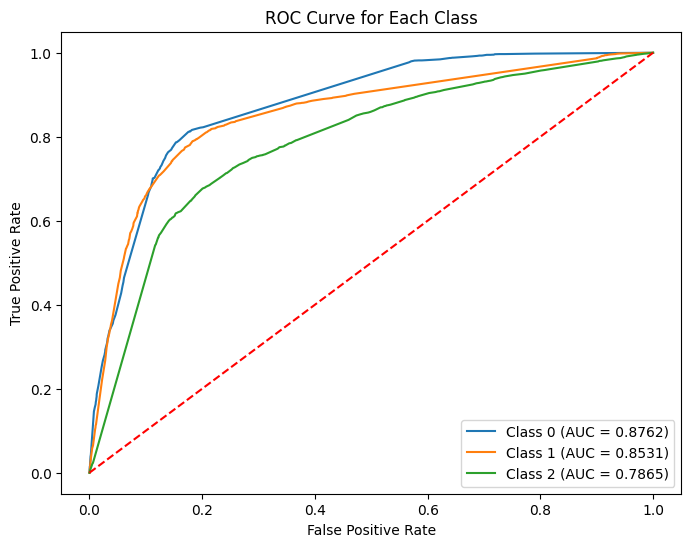

In [ ]:
# Evaluate the model accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# For ROC AUC (use predict_proba for probabilistic prediction)
# For multi-class, we need to use 'predict_proba' to get probabilities for all classes
y_prob = clf.predict_proba(X_test)

# Compute ROC AUC score for multi-class (using one-vs-rest strategy)
roc_auc = roc_auc_score(y_test, y_prob, multi_class='ovr', average='weighted')
print(f'ROC AUC Score (One-vs-Rest): {roc_auc:.4f}')

# ROC curve plotting for each class
n_classes = y_prob.shape[1]
fpr = dict()
tpr = dict()
roc_auc_class = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_prob[:, i])
    roc_auc_class[i] = roc_auc_score(y_test == i, y_prob[:, i])

# Plot ROC curves for each class
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc_class[i]:.4f})')

# Diagonal line (random classifier)
plt.plot([0, 1], [0, 1], linestyle='--', color='r')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Each Class')
plt.legend(loc='lower right')
plt.show()

### 6.2 Random Forest Classifier

In [ ]:
rf_clf = RandomForestClassifier(n_estimators=50, random_state=42)
rf_clf.fit(X_train, y_train)

# Predicting the test set results
y_pred = rf_clf.predict(X_test)

Accuracy: 0.7851

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.69      0.70      2790
           1       0.79      0.80      0.80      4783
           2       0.81      0.80      0.81      8744

    accuracy                           0.79     16317
   macro avg       0.77      0.77      0.77     16317
weighted avg       0.78      0.79      0.78     16317

ROC AUC Score (One-vs-Rest): 0.8908


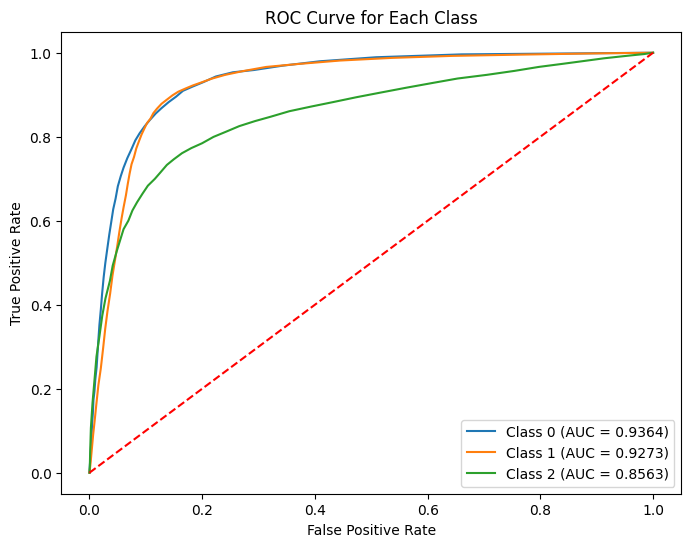

In [ ]:
# Evaluate the model accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# For ROC AUC (use predict_proba for probabilistic prediction)
# For multi-class, we need to use 'predict_proba' to get probabilities for all classes
y_prob = rf_clf.predict_proba(X_test)

# Compute ROC AUC score for multi-class (using one-vs-rest strategy)
roc_auc = roc_auc_score(y_test, y_prob, multi_class='ovr', average='weighted')
print(f'ROC AUC Score (One-vs-Rest): {roc_auc:.4f}')

# ROC curve plotting for each class
n_classes = y_prob.shape[1]
fpr = dict()
tpr = dict()
roc_auc_class = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_prob[:, i])
    roc_auc_class[i] = roc_auc_score(y_test == i, y_prob[:, i])

# Plot ROC curves for each class
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc_class[i]:.4f})')

# Diagonal line (random classifier)
plt.plot([0, 1], [0, 1], linestyle='--', color='r')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Each Class')
plt.legend(loc='lower right')
plt.show()

                      Feature  Importance
12           Outstanding_Debt    0.104657
5               Interest_Rate    0.079795
7         Delay_from_due_date    0.063793
9        Changed_Credit_Limit    0.062024
21       Debt_to_Income_Ratio    0.056677
18  Credit_History_Age_Months    0.056423
11                 Credit_Mix    0.047515
17            Monthly_Balance    0.047224
13   Credit_Utilization_Ratio    0.046496
16    Amount_invested_monthly    0.045762
10       Num_Credit_Inquiries    0.043371
15        Total_EMI_per_month    0.042551
1               Annual_Income    0.041834
8      Num_of_Delayed_Payment    0.041444
4             Num_Credit_Card    0.040844
2       Monthly_Inhand_Salary    0.039338
0                         Age    0.038448
3           Num_Bank_Accounts    0.032927
6                 Num_of_Loan    0.024546
14      Payment_of_Min_Amount    0.023684
20              Payment_Value    0.013021
19              Payment_Spent    0.007626


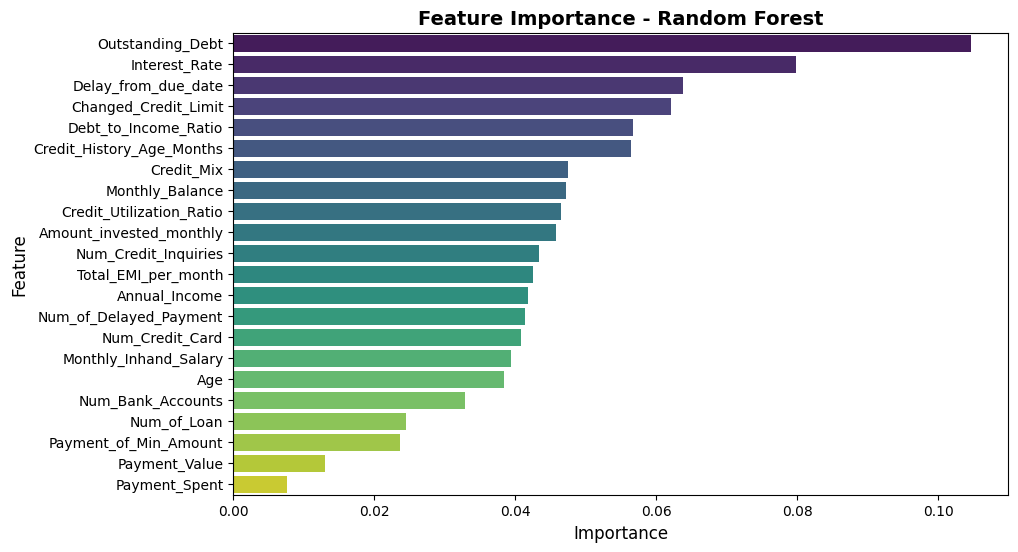

In [ ]:
# Get feature importances
feature_importances = rf_clf.feature_importances_

# Create a DataFrame to display the feature importance
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Sort the features by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the sorted feature importance
print(importance_df)

# Optional: Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette="viridis")
plt.title("Feature Importance - Random Forest", fontsize=14, fontweight="bold")
plt.xlabel("Importance", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.show()


### 6.3 XGBoost Classifier

In [ ]:
import xgboost as xgb

# Initialize the XGBoost classifier
xgb_clf = xgb.XGBClassifier(eval_metric='mlogloss',n_estimators=200, random_state=42)

# Train the XGBoost model
xgb_clf.fit(X_train, y_train)

# Predicting the test set results
y_pred = xgb_clf.predict(X_test)

Accuracy: 0.7704

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.67      0.70      2816
           1       0.78      0.76      0.77      4854
           2       0.78      0.81      0.79      8647

    accuracy                           0.77     16317
   macro avg       0.76      0.75      0.75     16317
weighted avg       0.77      0.77      0.77     16317

ROC AUC Score (One-vs-Rest): 0.8810


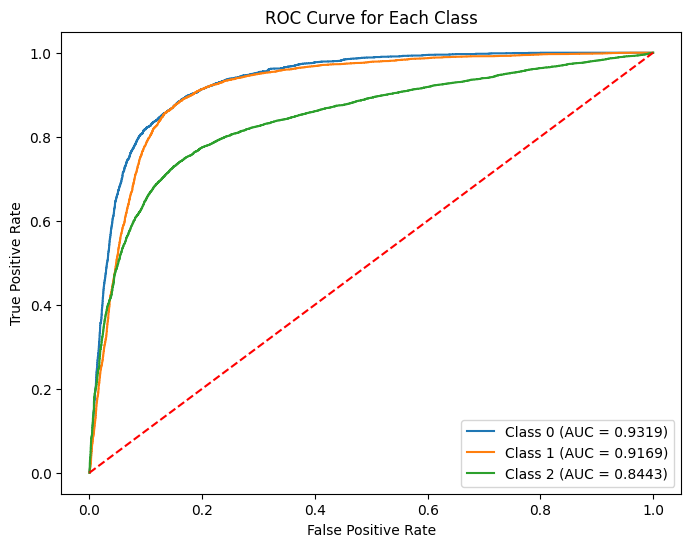

In [ ]:
# Evaluate the model accuracy
accuracy3 = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy3:.4f}')

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# For ROC AUC (use predict_proba for probabilistic prediction)
# For multi-class, we need to use 'predict_proba' to get probabilities for all classes
y_prob = xgb_clf.predict_proba(X_test)

# For ROC AUC (use predict_proba for probabilistic prediction)
# For multi-class, we need to use 'predict_proba' to get probabilities for all classes
y_prob = xgb_clf.predict_proba(X_test)

# Compute ROC AUC score for multi-class (using one-vs-rest strategy)
roc_auc = roc_auc_score(y_test, y_prob, multi_class='ovr', average='weighted')
print(f'ROC AUC Score (One-vs-Rest): {roc_auc:.4f}')

# ROC curve plotting for each class
n_classes = y_prob.shape[1]
fpr = dict()
tpr = dict()
roc_auc_class = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_prob[:, i])
    roc_auc_class[i] = roc_auc_score(y_test == i, y_prob[:, i])

# Plot ROC curves for each class
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc_class[i]:.4f})')

# Diagonal line (random classifier)
plt.plot([0, 1], [0, 1], linestyle='--', color='r')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Each Class')
plt.legend(loc='lower right')
plt.show()


### 6.4 Logistic Regression:

---



In [ ]:
# One-Vs-Rest (default multiclass Logistic Regression)
ovr_model = LogisticRegression(multi_class='ovr')
ovr_model.fit(X_train, y_train)

# Predicting the test set results
y_pred = ovr_model.predict(X_test)


accuracy4 = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy4:.4f}')


# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.1727

Classification Report:
              precision    recall  f1-score   support

           0       0.17      1.00      0.29      2816
           1       0.00      0.00      0.00      4854
           2       0.75      0.00      0.00      8647

    accuracy                           0.17     16317
   macro avg       0.31      0.33      0.10     16317
weighted avg       0.43      0.17      0.05     16317



In [ ]:
# sofmax
sofmax = LogisticRegression(multi_class='multinomial',solver='lbfgs')
sofmax.fit(X_train, y_train)

# Predicting the test set results
y_pred = sofmax.predict(X_test)


accuracy4 = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy4:.4f}')


# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.1727

Classification Report:
              precision    recall  f1-score   support

           0       0.17      1.00      0.29      2816
           1       0.00      0.00      0.00      4854
           2       0.75      0.00      0.00      8647

    accuracy                           0.17     16317
   macro avg       0.31      0.33      0.10     16317
weighted avg       0.43      0.17      0.05     16317

